In [9]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [14]:
data_path = "./data/train.csv"

In [15]:
data_raw = pd.read_csv(data_path)
data_raw.shape

(159571, 8)

In [16]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8




**Sample data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [17]:
### 1.1. Checking for missing values
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [18]:
### 1.2. Calculating number of comments under each label
# Comments with no label are considered to be clean comments.
# Creating separate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [19]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [20]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


In [24]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(data_raw.iloc[:,2:].sum().values, categories)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1500x800 with 0 Axes>

In [25]:
### 1.3. Calculating number of comments having multiple labels

rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1500x800 with 0 Axes>

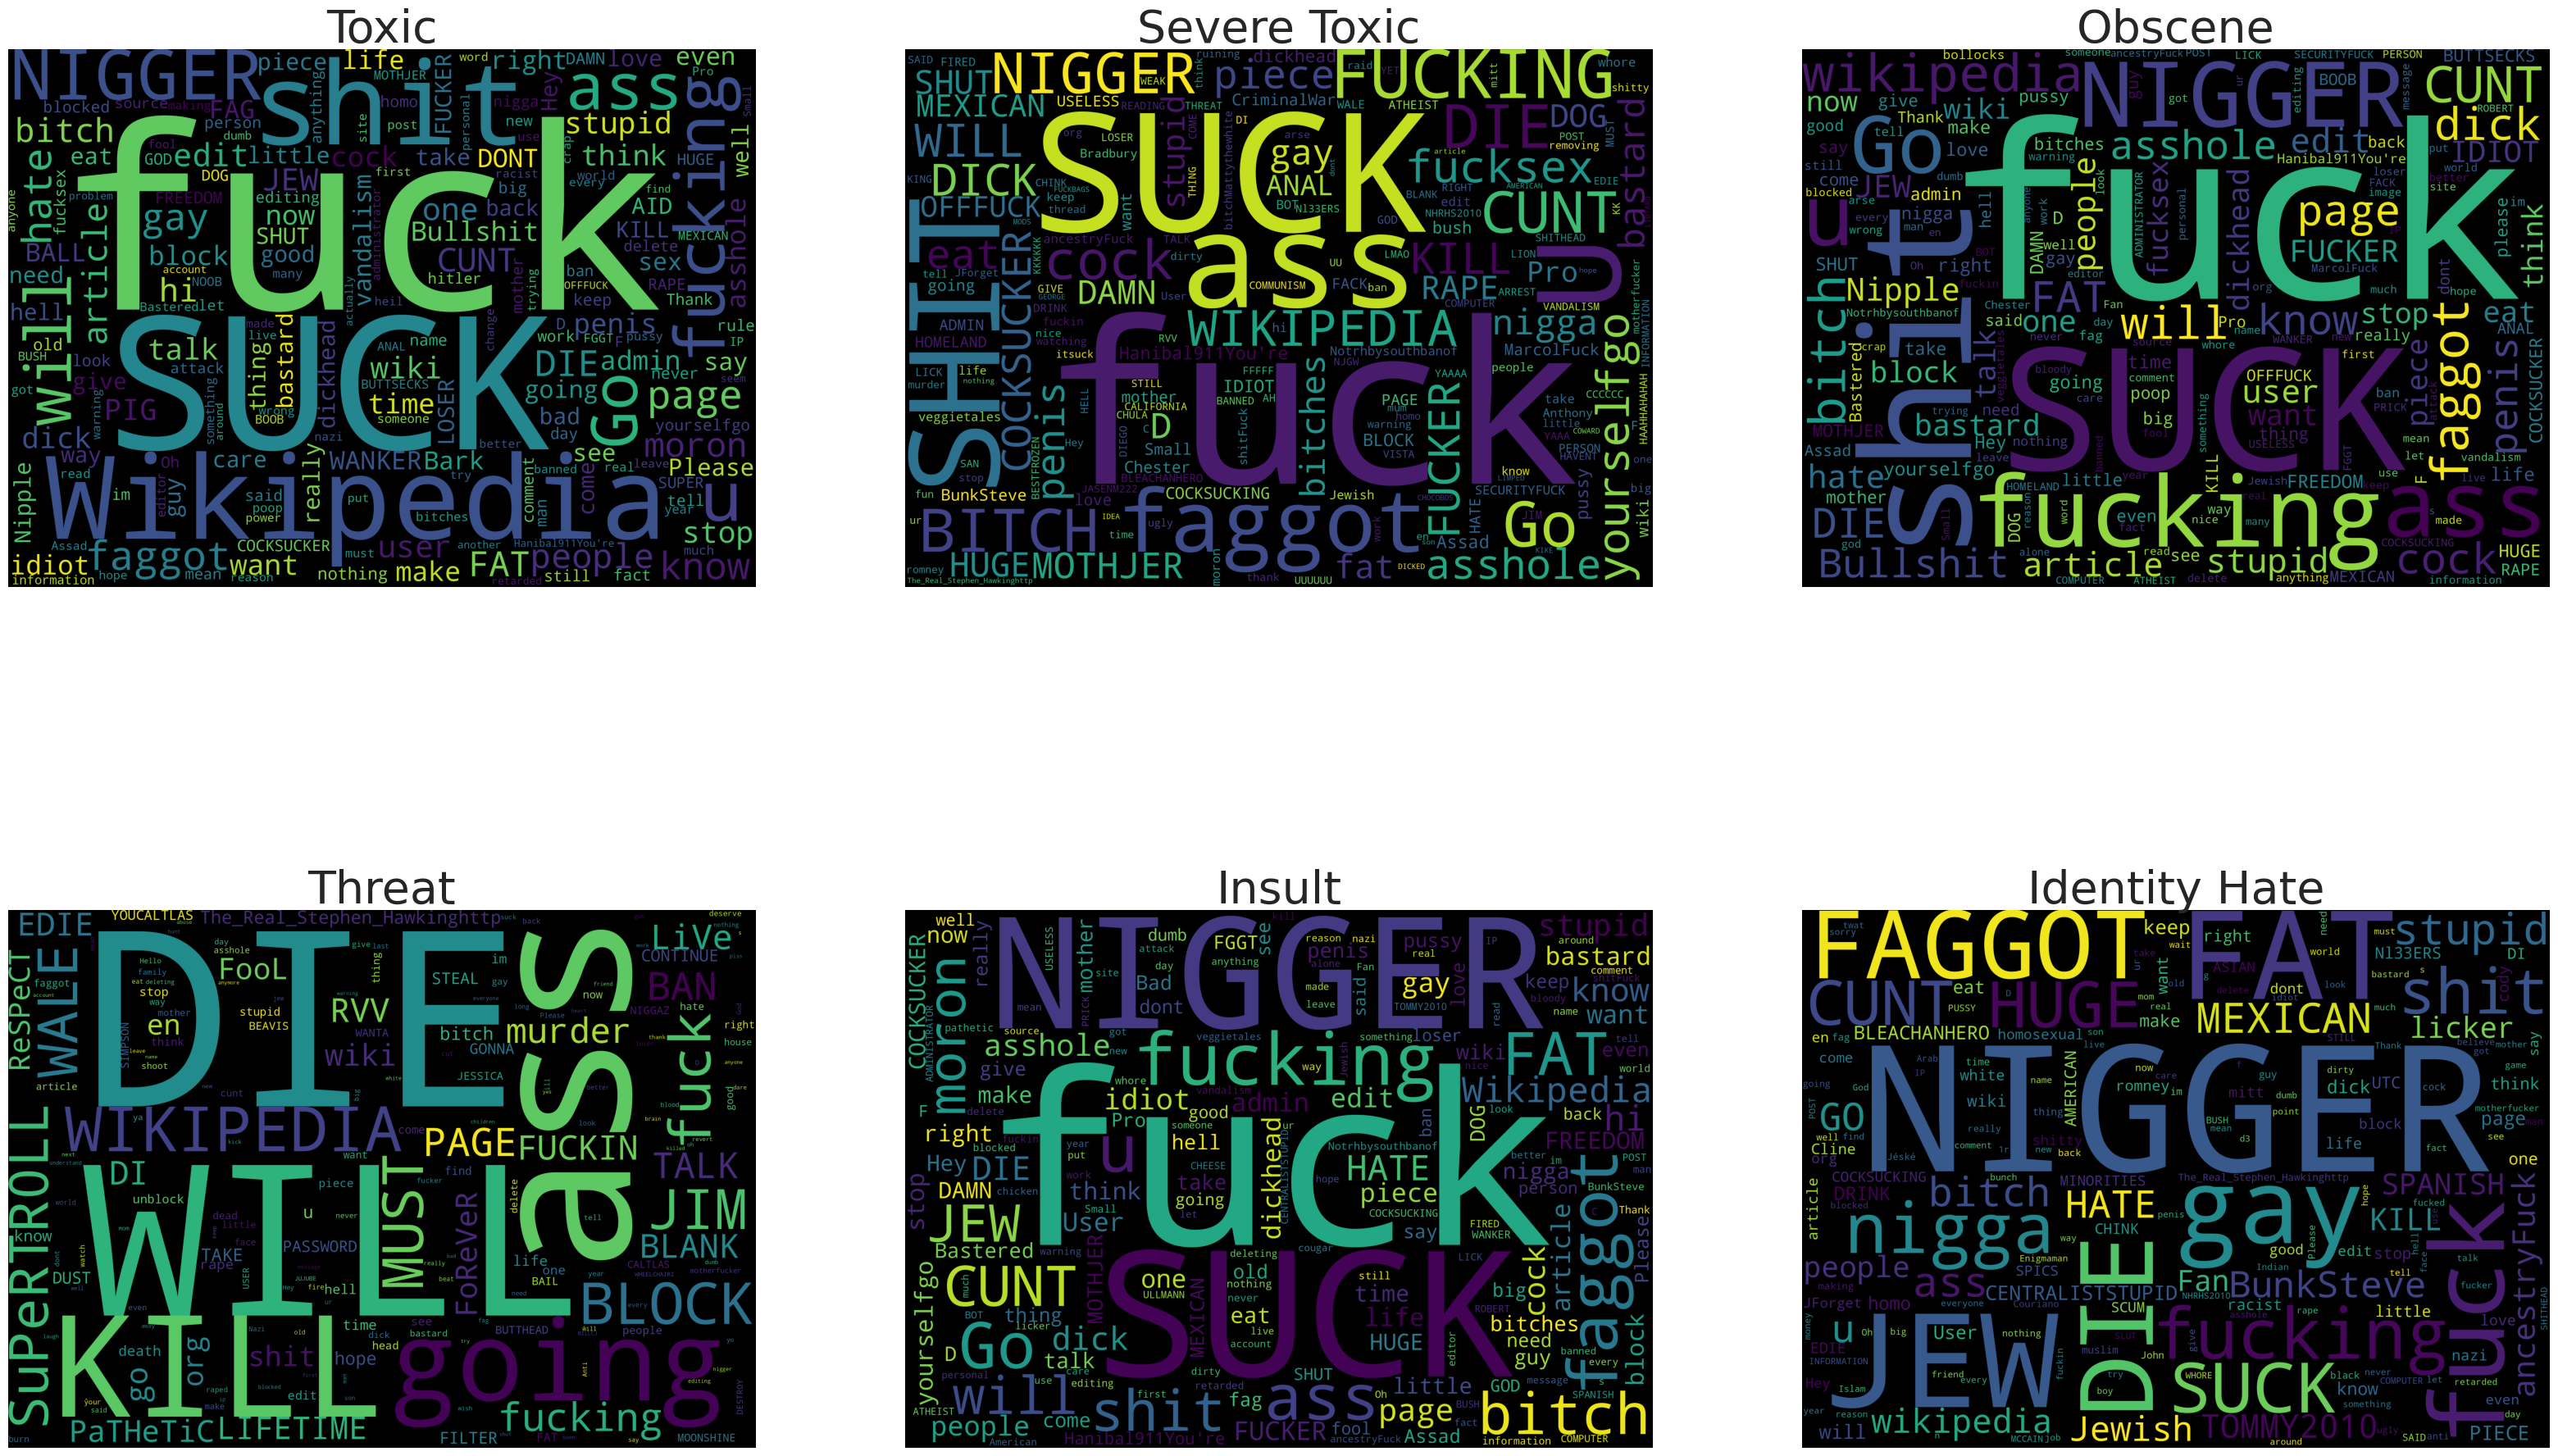

In [26]:
### WordCloud representation of most used words in each category of comments
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

In [27]:
### 2. Data Pre-Processing
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to /home/payam/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
### 2.1 Cleaning Data
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [34]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
24175,3fdb4147d46bc08e,and what do you mean by my issue i attempted a...,0,0,0,0,0,0
29680,4ec5121b53d86454,thanks once in a while i hit one that i can so...,0,0,0,0,0,0
123454,945caca42ae0a845,loveline the tv show i noticed that loveline t...,0,0,0,0,0,0
132534,c5181bf076c8007f,this stayed out from the merged pages self sac...,0,0,0,0,0,0
121602,8a99e09fb91b9a50,rose where are you i need to know where is the...,0,0,0,0,0,0


In [38]:
# 2.2. Removing Stop Words
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])

re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

{"you'll", 'and', 'yourself', 'from', 'both', 'didn', 'such', 'our', 'his', 'were', 'was', 'those', 'of', 'no', 'too', 'ourselves', 'may', 'yet', 've', 'did', 'among', 'own', 'needn', 'one', 'isn', 'she', 'out', 'three', 's', 'ours', 'because', 'these', 'don', 'wasn', 'their', 'within', 'few', 'nor', 'through', "couldn't", "hasn't", 'below', "don't", 'not', 'hers', 'any', 'her', 'do', 'o', 'doing', 'all', 'further', 'are', 'across', 'ain', 'weren', 'while', 'off', 'herself', 'than', 'in', 't', 'now', 'it', 'how', 'five', 'can', 'same', 'they', "won't", 'nine', 'who', 're', 'am', 'down', 'won', 'yourselves', 'i', 'about', 'a', 'shan', 'at', 'against', 'y', 'or', 'yours', 'very', 'had', 'to', 'couldn', 'haven', 'mightn', 'why', 'most', 'themselves', 'should', 'wouldn', 'if', "you've", 'then', 'doesn', 'its', 'six', 'which', "doesn't", 'into', 'where', 'some', 'an', 'eight', 'when', 'until', "mightn't", 'just', "you're", 'other', 'ma', 'the', 'on', "she's", "shouldn't", 'll', 'more', 'is'

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
24175,3fdb4147d46bc08e,mean issue attempted single sentence ...,0,0,0,0,0,0
29680,4ec5121b53d86454,thanks hit source well easy,0,0,0,0,0,0
123454,945caca42ae0a845,loveline tv show noticed loveline tv show ...,0,0,0,0,0,0
132534,c5181bf076c8007f,stayed merged pages self sacrifice jewish...,0,0,0,0,0,0
121602,8a99e09fb91b9a50,rose need know queue marry rose,0,0,0,0,0,0


In [39]:
### 2.3. Stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
24175,3fdb4147d46bc08e,mean issu attempt singl sentenc edit jesus sup...,0,0,0,0,0,0
29680,4ec5121b53d86454,thank hit sourc well easi,0,0,0,0,0,0
123454,945caca42ae0a845,lovelin tv show notic lovelin tv show includ t...,0,0,0,0,0,0
132534,c5181bf076c8007f,stay merg page self sacrific jewish law pikuac...,0,0,0,0,0,0
121602,8a99e09fb91b9a50,rose need know queue marri rose,0,0,0,0,0,0


In [40]:
### 2.4. Train-Test Split
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [42]:
train_text = train['comment_text']
test_text = test['comment_text']

In [43]:
### 2.5. TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [45]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

In [46]:
## 3. Multi-Label Classification
### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [55]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))

    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])

    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing toxic comments...**

Test accuracy is 0.9083333333333333




**Processing severe_toxic comments...**

Test accuracy is 0.9966666666666667




**Processing obscene comments...**

Test accuracy is 0.955




**Processing threat comments...**

Test accuracy is 0.9966666666666667




**Processing insult comments...**

Test accuracy is 0.9483333333333334




**Processing identity_hate comments...**

Test accuracy is 0.99


CPU times: user 123 ms, sys: 10.6 ms, total: 133 ms
Wall time: 3.22 s


In [62]:
### 3.2. Multiple Binary Classifications - (Binary Relevance)
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

In [65]:
%%time
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier

classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.865


CPU times: user 7.42 s, sys: 4.45 s, total: 11.9 s
Wall time: 11.9 s


In [68]:
## 3.3. Classifier Chains
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
import pickle

In [71]:
%%time

# initialize classifier chains multi-label classifier
classifier_chain = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier_chain.fit(x_train, y_train)

# predict
predictions = classifier_chain.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

with open("./model.pckl", "wb") as f:
         pickle.dump(classifier_chain, f)

Accuracy =  0.9016666666666666


CPU times: user 42.2 s, sys: 49.2 s, total: 1min 31s
Wall time: 22 s


In [60]:
## 3.4. Label Powerset
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [61]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9016666666666666


CPU times: user 2min 7s, sys: 4min 38s, total: 6min 45s
Wall time: 54.1 s


In [66]:
## 3.5. Adapted Algorithm

# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [67]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

TypeError: __init__() takes 1 positional argument but 2 were given

In [72]:
with open('model.pckl', 'rb') as handle:
    b = pickle.load(handle)

print(b==classifier_chain)

False


In [73]:
print(b)

ClassifierChain(classifier=LogisticRegression(), require_dense=[True, True])


In [74]:
# predict
predictions = b.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9016666666666666


